## zadanie 5
### część 1

In [30]:
import numpy as np, matplotlib.pyplot as plt

In [31]:
def oblicz_regresje(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b0 = y_mean - b1 * x_mean
    return b0, b1

In [32]:
N1 = 100
N2 = 1000
sigmas = [0.1, 0.5,0.9, 1.1, 1.5, 2, 3]
mc = 500

In [33]:
def punkt_zmiany(n, l, sigma):
    dane1 = np.random.normal(0, sigma**2, size = int(l*n))
    dane2 = np.random.normal(0, 1, size = int((1-l)*n))
    dane = np.concatenate([dane1, dane2])
    potencjalne_k = range(2, n-1)
    V = {}
    # for k in potencjalne_k:
    #     c = []
    #     for i in range(n+1):
    #         c.append(sum(xi**2 for xi in dane[:i+1]))
    c = np.cumsum(dane**2)
    for k in potencjalne_k:
        c1 = c[:k+1]
        c2 = c[k+1:]
        cz1 = np.arange(0,k+1)
        cz2 = np.arange(k+1, n)
        alfa1, beta1 = oblicz_regresje(cz1, c1)
        alfa2, beta2 = oblicz_regresje(cz2, c2)
        V[k] = np.sum((c1 - (alfa1 + beta1*cz1))**2) + np.sum((c2 - (alfa2 + beta2*cz2))**2 )
    return min(V, key = V.get)

In [34]:
punkt_zmiany(1000, 0.3, 1.1)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


312

In [37]:
def zadanie_5cz1(n, l):
    kk = {}
    for sigma in sigmas:
        kk[sigma] = []
        for _ in range(mc):
            kk[sigma].append(punkt_zmiany(n, l, sigma))
    plt.boxplot(kk.values(), labels=kk.keys())
    plt.xlabel('sigma')
    plt.axhline(y=l*n, linestyle='--', color = 'red')
    plt.title(f'Symulacja dla n={n} w punkcie zmiany reżimu l={l}*n')
    plt.savefig(f'n{n}_l0{int(l*10)}.png')
    plt.show()

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


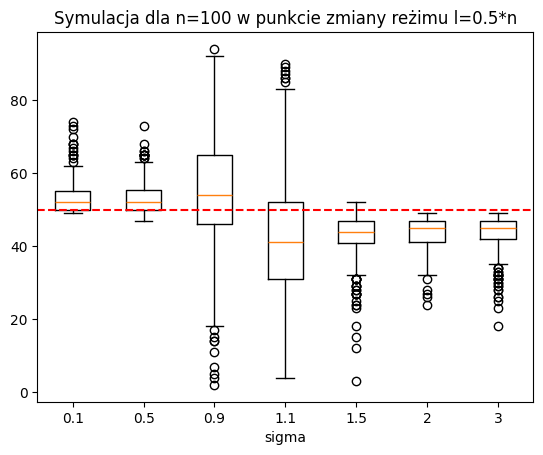

In [38]:
zadanie_5cz1(100, 0.5)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


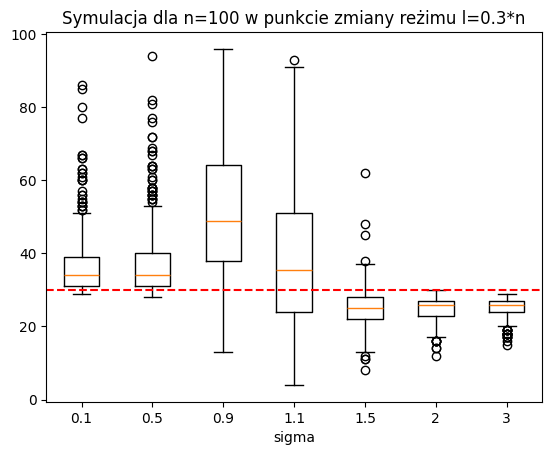

In [39]:
zadanie_5cz1(100, 0.3)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


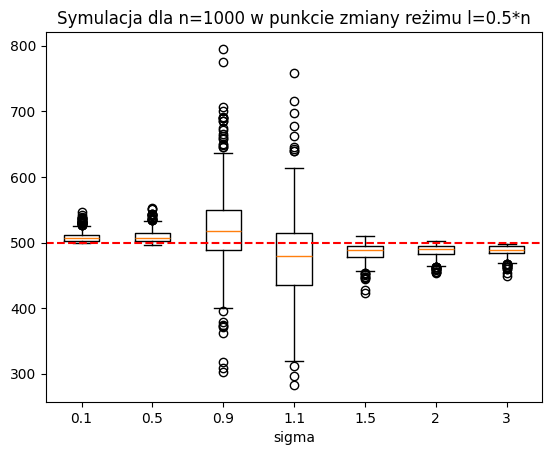

In [40]:
zadanie_5cz1(1000, 0.5)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


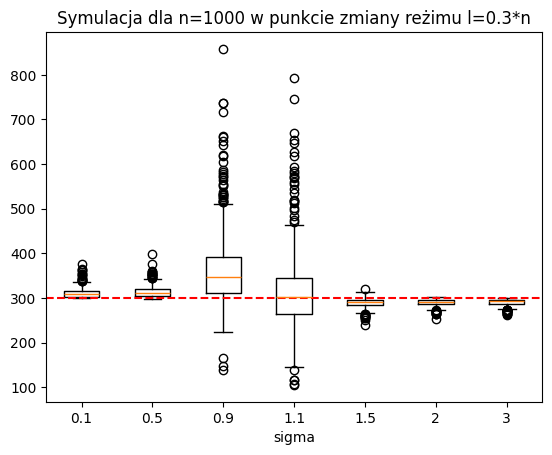

In [41]:
zadanie_5cz1(1000, 0.3)

### część 2
na wykresach podana liczba to ile obserwacji usunięto

In [42]:
from scipy.stats import binom

In [43]:
def punkt_zmiany2(n, l, sigma, alpha = 0.05):
    dane1 = np.random.normal(0, sigma**2, size = int(l*n))
    dane2 = np.random.normal(0, 1, size = int((1-l)*n))
    dane = np.concatenate([dane1, dane2])
    potencjalne_k = range(2, n-1)
    V = {}
    # for k in potencjalne_k:
    #     c = []
    #     for i in range(n+1):
    #         c.append(sum(xi**2 for xi in dane[:i+1]))
    c = np.cumsum(dane**2)
    X = dane**2
    for k in potencjalne_k:
        c1 = c[:k+1]
        c2 = c[k+1:]
        cz1 = np.arange(0,k+1)
        cz2 = np.arange(k+1, n)
        alfa1, beta1 = oblicz_regresje(cz1, c1)
        alfa2, beta2 = oblicz_regresje(cz2, c2)
        V[k] = np.sum((c1 - (alfa1 + beta1*cz1))**2) + np.sum((c2 - (alfa2 + beta2*cz2))**2 )
    k = min(V, key = V.get)
    x1 = X[:k+1]
    x2 = X[k+1:]
    std1 = np.std(x1)
    std2 = np.std(x2)
    if std1<std2:
      A = x1
      B = x2
    else:
      A = x2
      B = x1
    kwantyl_a2 = np.percentile(A, alpha*100/2)
    kwantyl_1a2 = np.percentile(A, 100*(1- alpha/2))
    D = np.sum((kwantyl_a2 <= B) & (B <= kwantyl_1a2))
    p = 1 - alpha
    p_value = binom.cdf(D, n = len(B), p = p)
    # jak p-wartosc jest wieksza niz alpha, to fałsz
    # czyli jak <= to prawda - wtedy zapisujemy jako valid_k

    return k, alpha >= p_value

In [ ]:
alpha = 0.05
def zadanie_5(n, l, alpha = alpha):
    kk = {}
    valid_k = {}
    odrzucone = {}
    for sigma in sigmas:
        kk[sigma] = []
        valid_k[sigma] = []
        odrzucone[sigma] = 0
        for _ in range(mc):
            k, czyok = punkt_zmiany2(n, l, sigma, alpha = alpha)
            kk[sigma].append(k)
            if czyok:
                valid_k[sigma].append(k)
            else:
                odrzucone[sigma] += 1
    color1 = 'skyblue'
    color2 = 'salmon'
    # tutaj przy plotowaniu musiałam się trochę wspomóc żeby to wyglądało estetycznie
    for i, sigma in enumerate(kk.keys()):

        plt.boxplot(kk[sigma], positions=[i * 2], widths=0.6,
                boxprops=dict(facecolor = color1, color=color1), patch_artist=True,
                medianprops=dict(color="black"), flierprops=dict(markerfacecolor=color1, marker='o', color=color1))

        plt.boxplot(valid_k[sigma], positions=[i * 2 + 0.6], widths=0.6,
                boxprops=dict(facecolor = color2, color=color2), patch_artist=True,
                medianprops=dict(color="black"), flierprops=dict(markerfacecolor=color2, marker='o', color=color2))

        plt.text(i * 2 + 0.3, max(kk[sigma] + valid_k[sigma]) + 0.5,
             f'{odrzucone[sigma]}', ha='center', va='bottom', fontsize=10, color='black')

    plt.xticks([i * 2 + 0.3 for i in range(len(kk))], kk.keys())
    plt.xlabel("σ")
    plt.ylabel("Punkt zmiany reżimu")
    plt.axhline(y=l*n, linestyle='--', color = 'red')
    plt.title(f'Symulacja dla n={n} w punkcie zmiany reżimu l={l}*n')
    plt.legend([plt.Line2D([0], [0], color=color1, lw=4),
            plt.Line2D([0], [0], color=color2, lw=4)],
           ['Wszystkie obserwacje', 'Po usunięciu'], loc="upper right")

    plt.savefig(f'n{n}_l0{int(l*10)}.png')
    plt.show()
    for i, sigma in enumerate(sigmas):
      removed = odrzucone[sigma]
      accepted = len(kk[sigma]) - removed
      sizes = [removed, accepted]
      labels = ['Odrzucone', 'Nieodrzucone']
      colors = ['salmon', 'skyblue']
      plt.figure(figsize=(7, 7))
      plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
      plt.title(f'Procent odrzuconych dla sigma = {sigma}')
      plt.savefig(f'n{n}_l0{int(l*10)}sigma{i}_pie.png')
      plt.show()

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


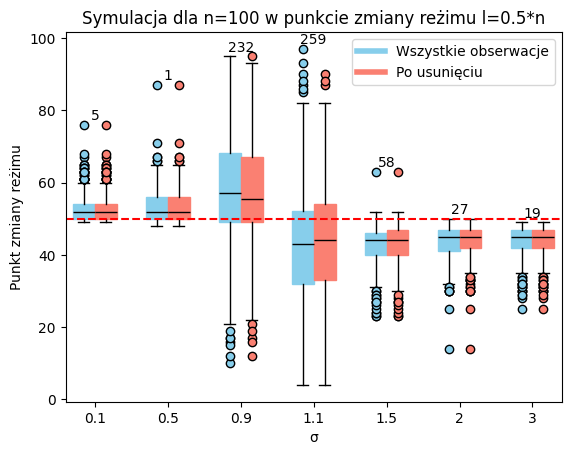

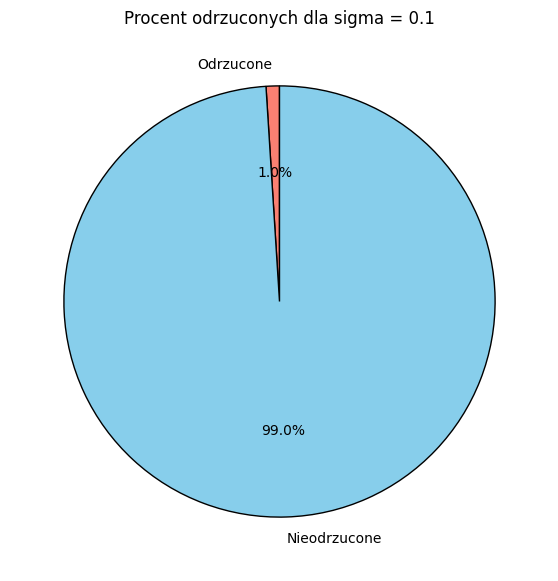

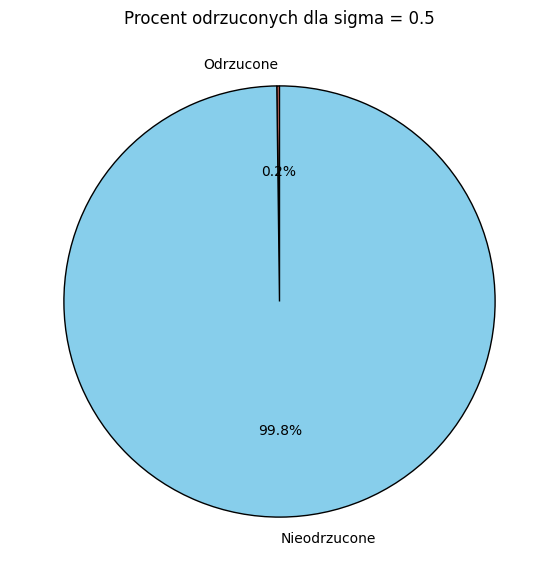

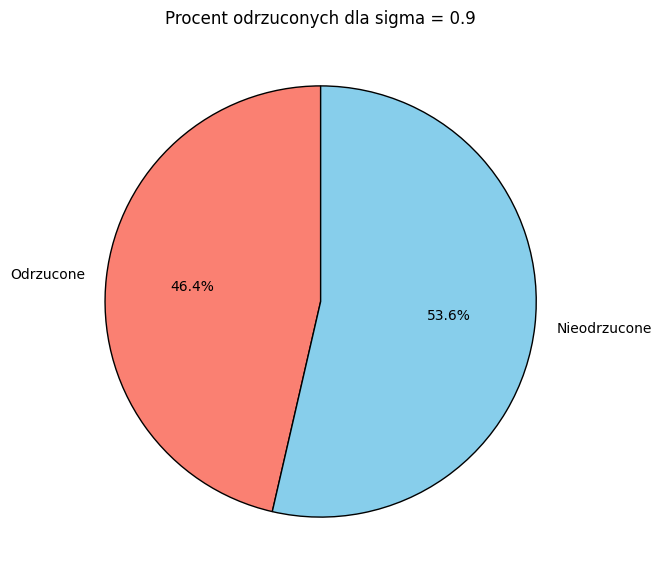

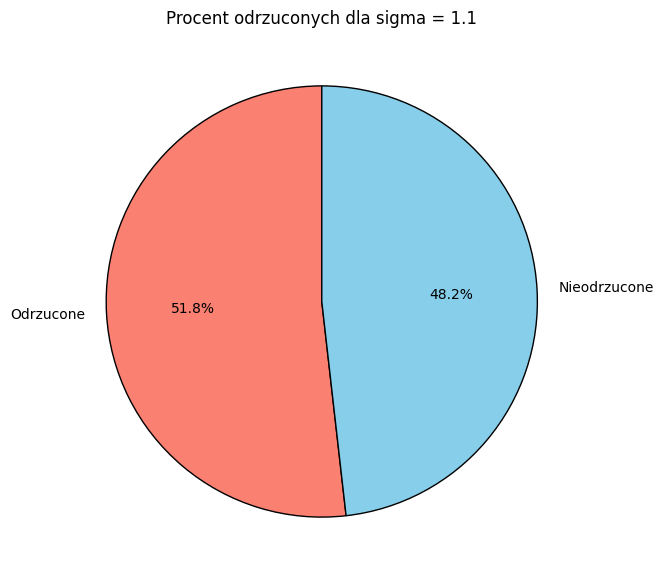

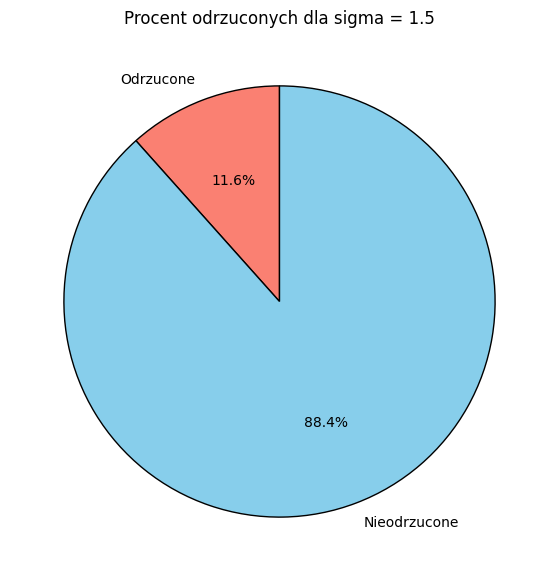

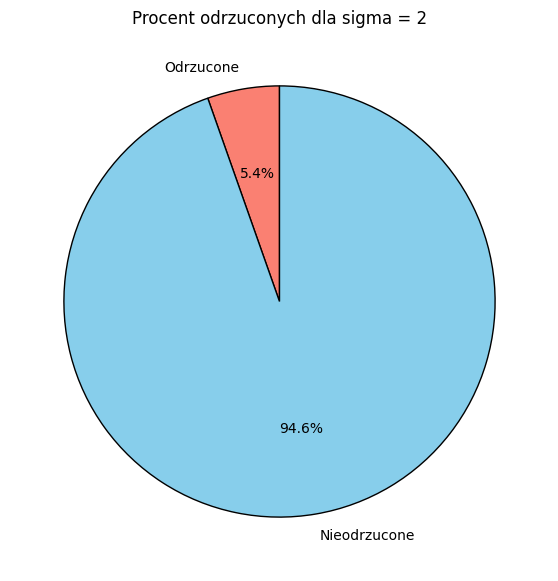

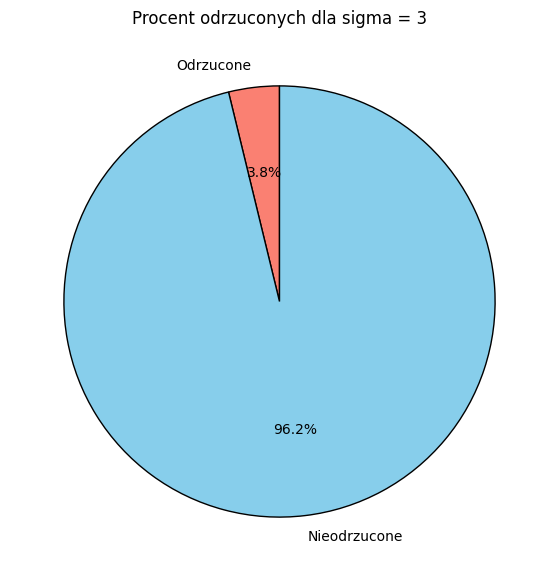

In [51]:
zadanie_5(100, 0.5)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


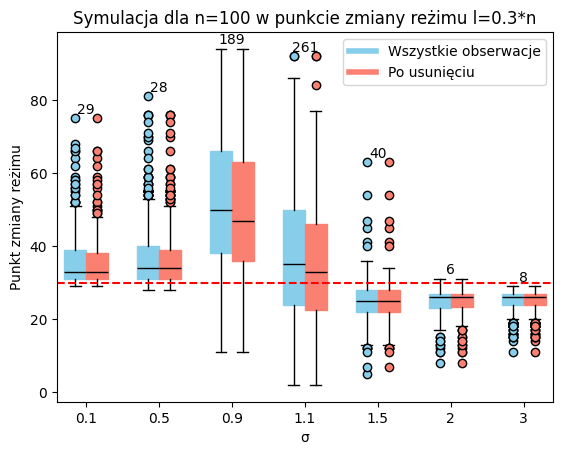

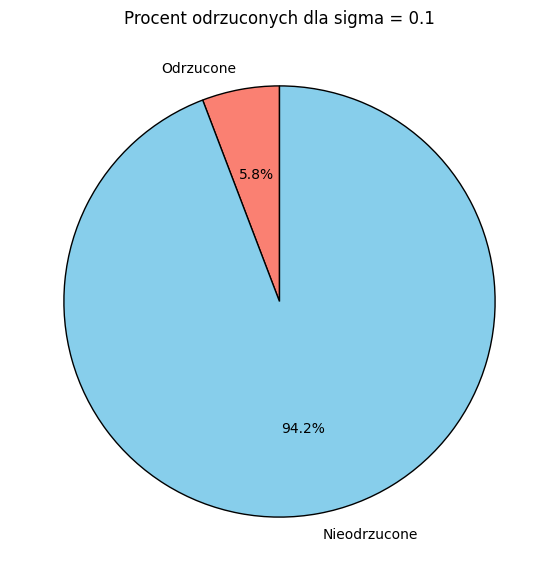

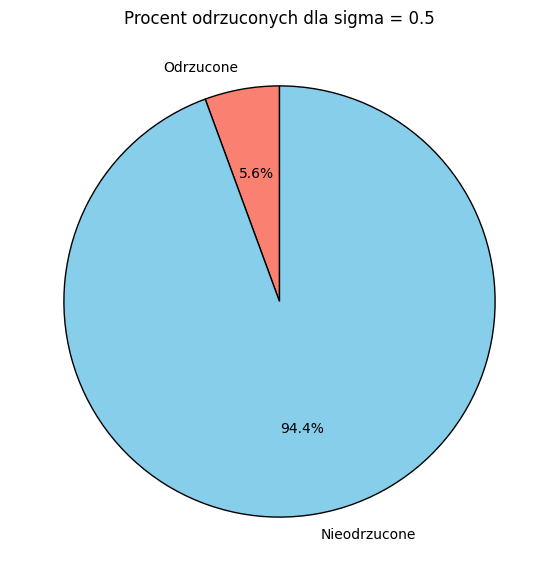

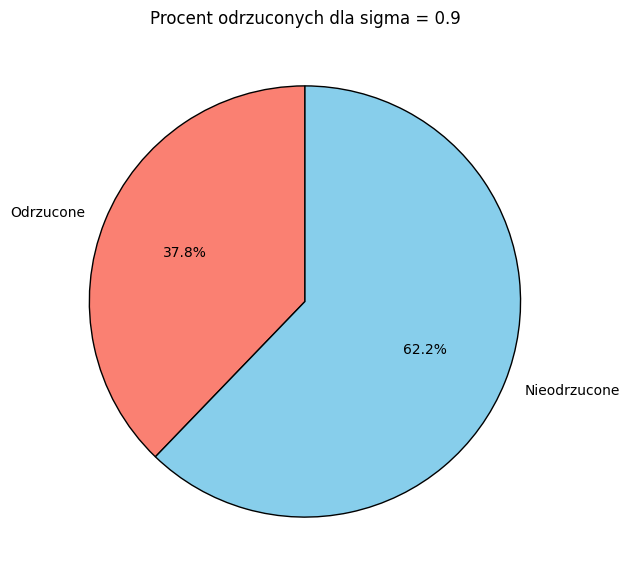

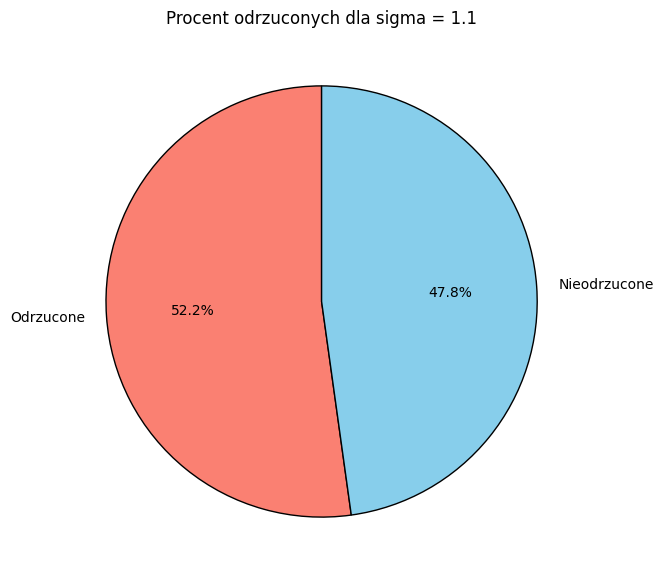

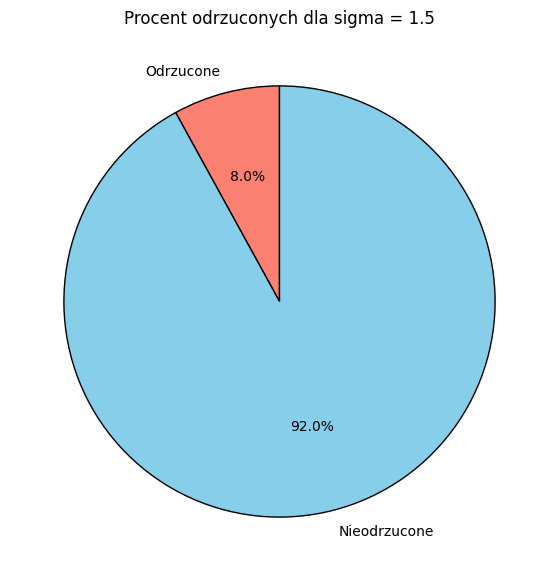

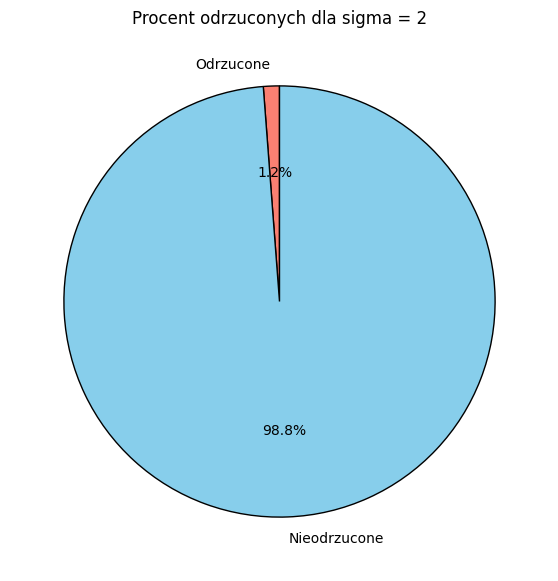

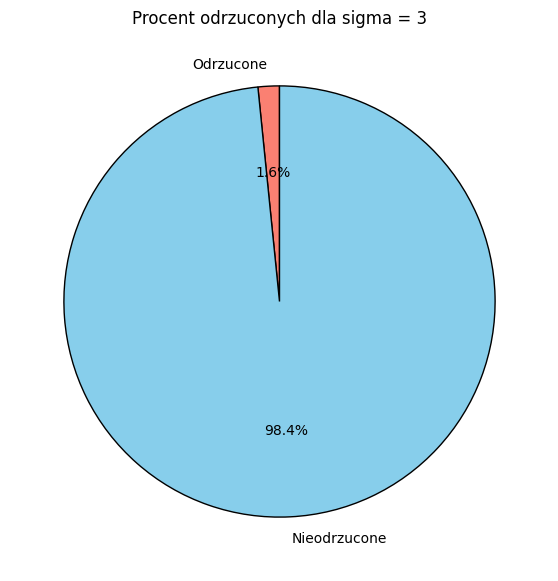

In [52]:
zadanie_5(100, 0.3)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


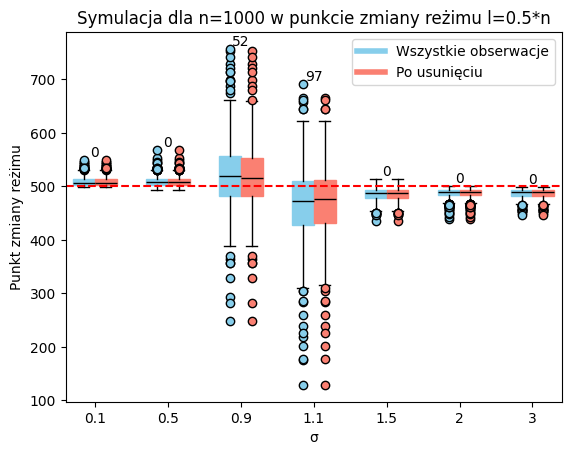

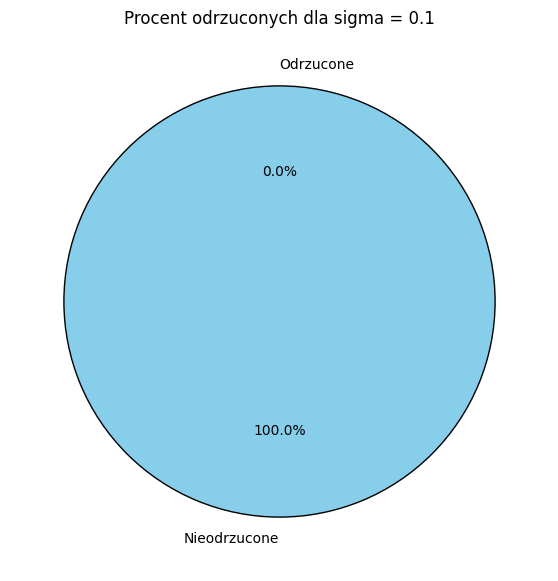

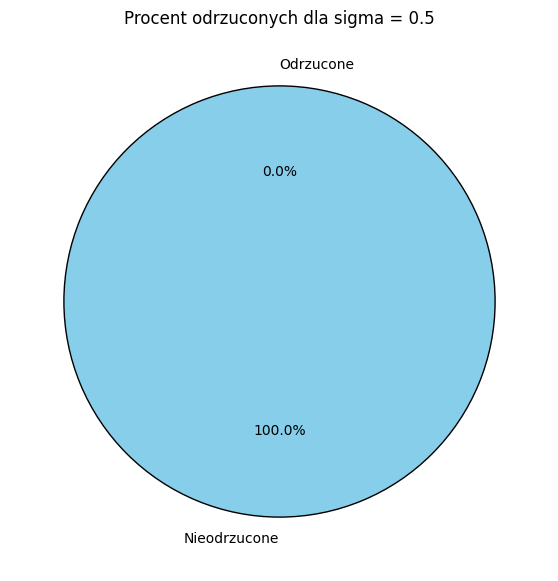

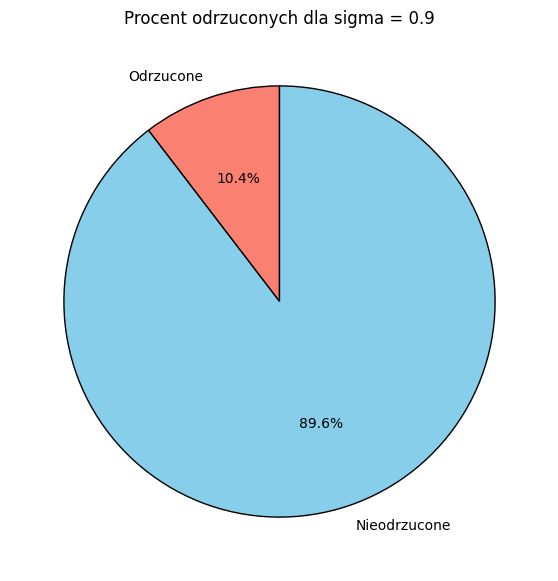

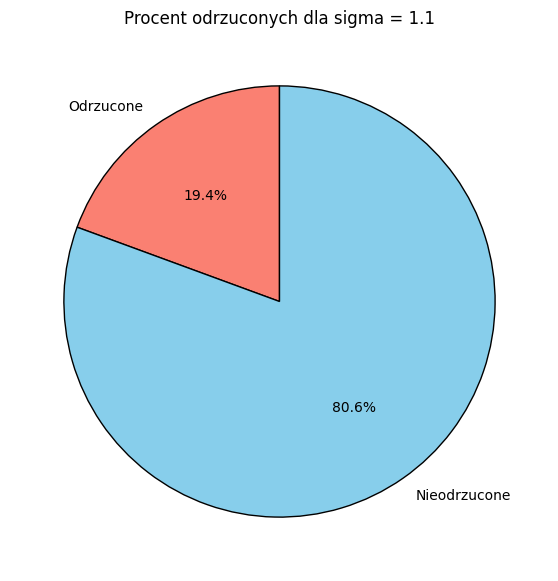

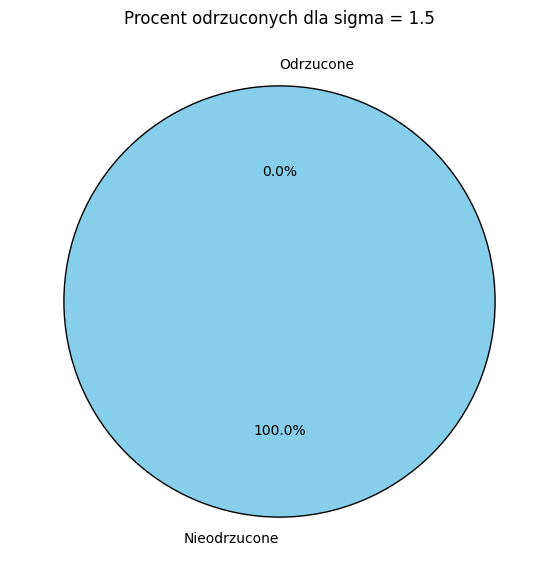

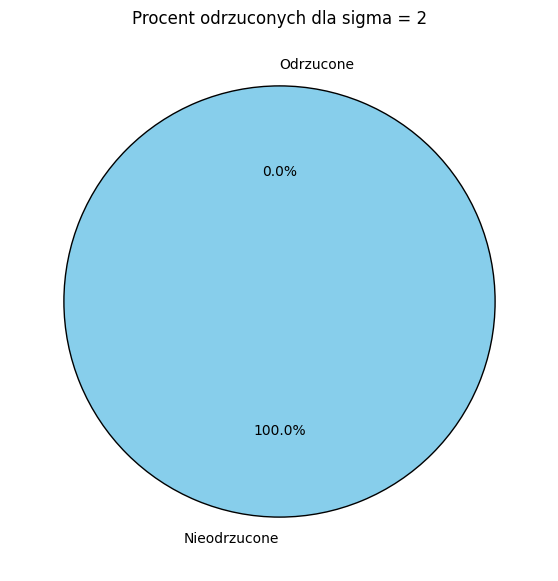

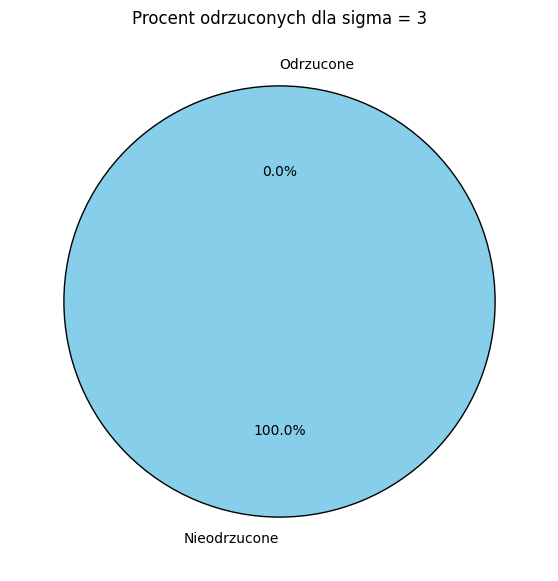

In [53]:
zadanie_5(1000, 0.5)

<ipython-input-31-a6a291692acd>:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


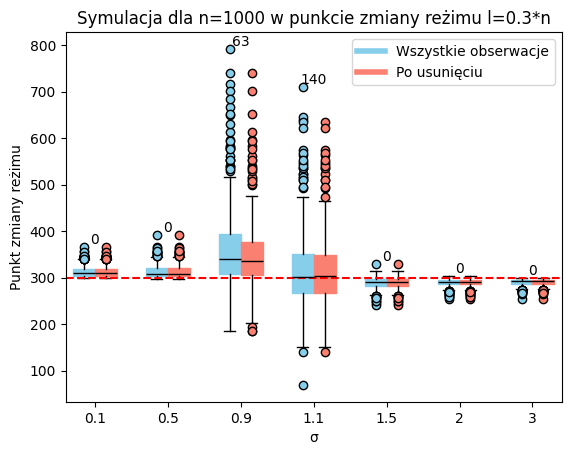

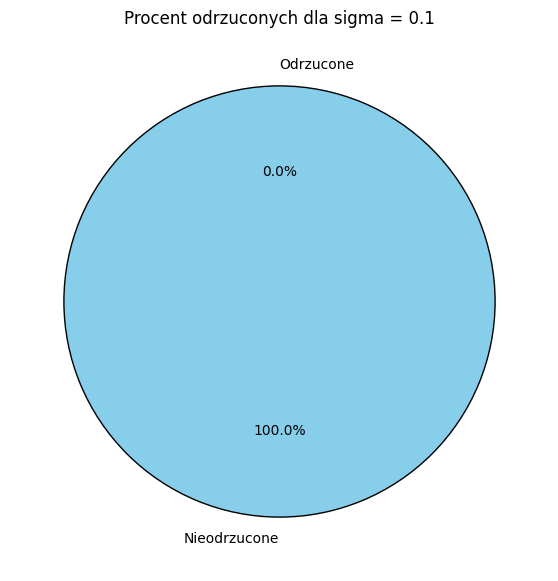

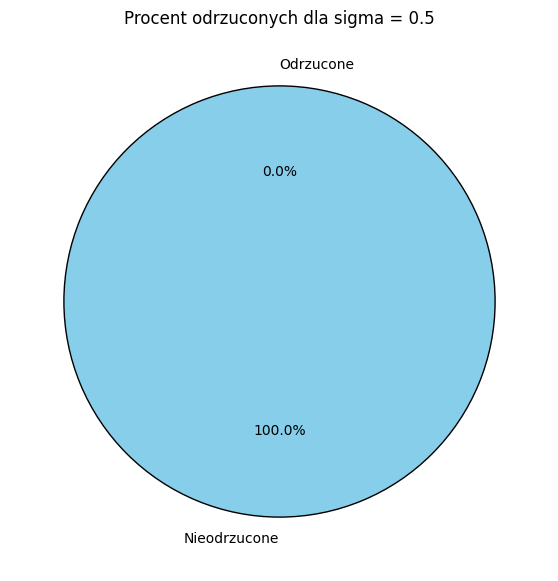

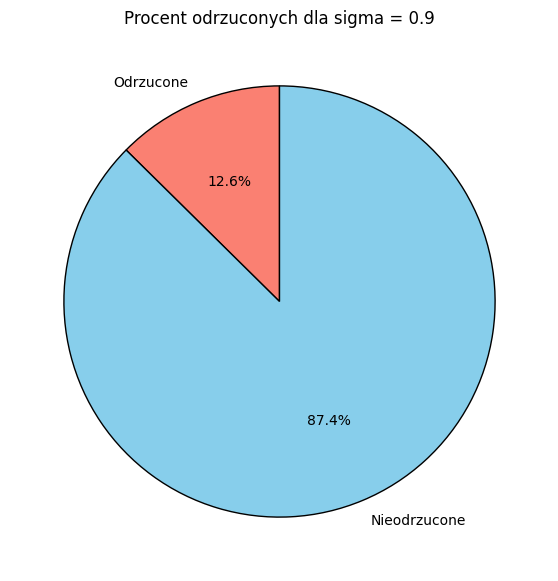

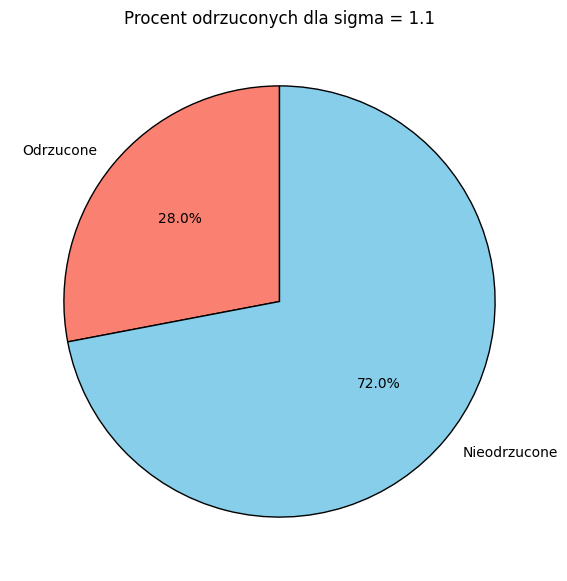

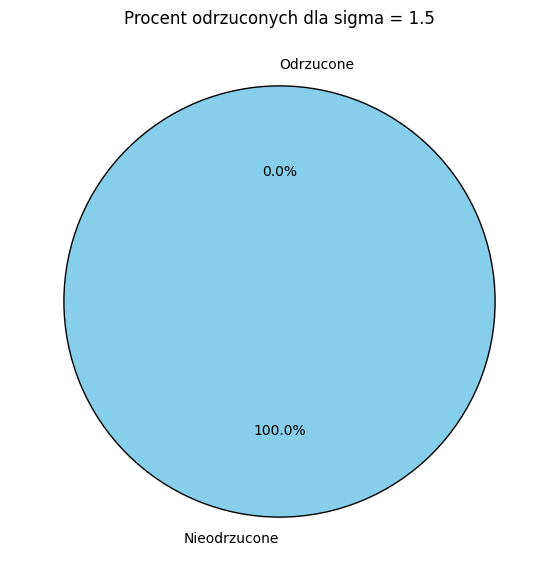

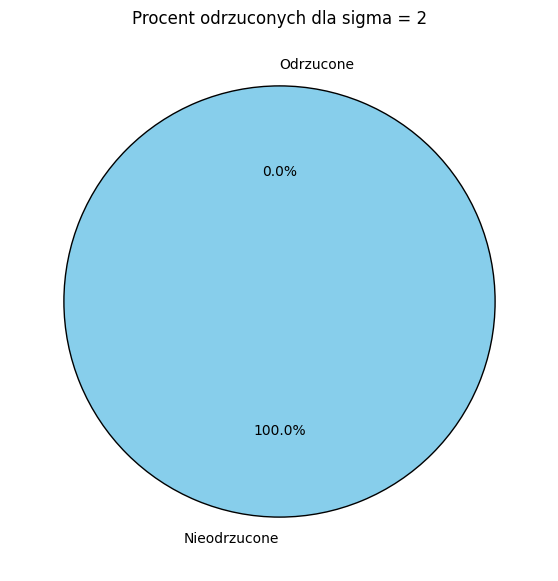

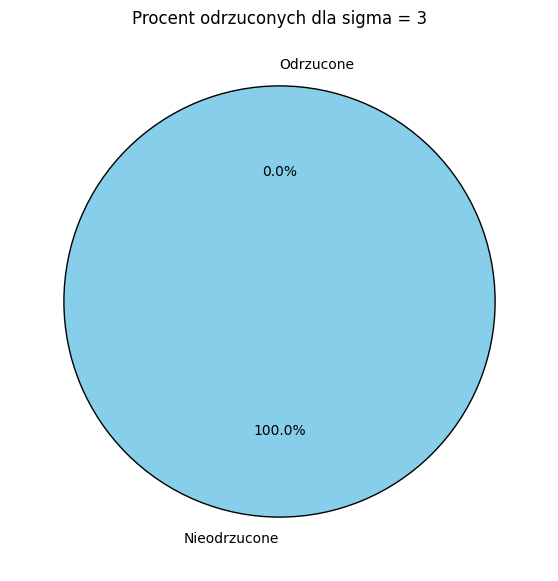

In [54]:
zadanie_5(1000, 0.3)